In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 6: AR Model

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [4]:
#get data
series = pd.read_csv('../data/catfish.csv', parse_dates=[0], index_col=0)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

In [5]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


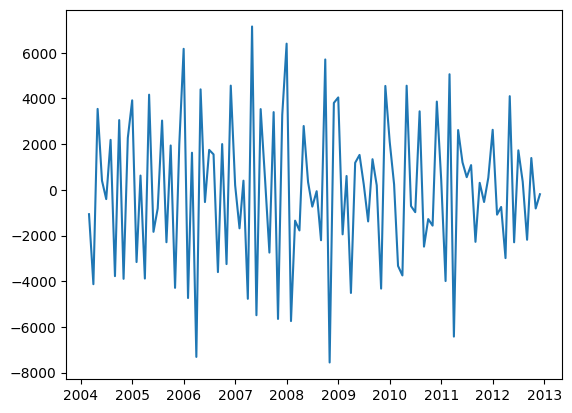

In [6]:
plt.plot(series)

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


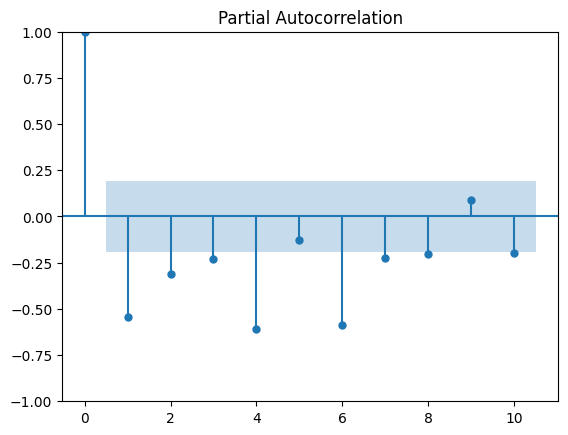

In [7]:
plot_pacf(series, lags=10)
plt.show()

# AR(4) seems to be reasonable enough

In [8]:
ARIMA?

In [9]:
ar_model = ARIMA(series, order=(4,0,0))
ar_model_fit = ar_model.fit()

In [10]:
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  106
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -957.805
Date:                Wed, 22 Mar 2023   AIC                           1927.610
Time:                        12:55:45   BIC                           1943.591
Sample:                    03-01-2004   HQIC                          1934.087
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0749     59.076     -0.323      0.747    -134.862      96.712
ar.L1         -0.9029      0.105     -8.620      0.000      -1.108      -0.698
ar.L2         -0.7355      0.121     -6.098      0.0

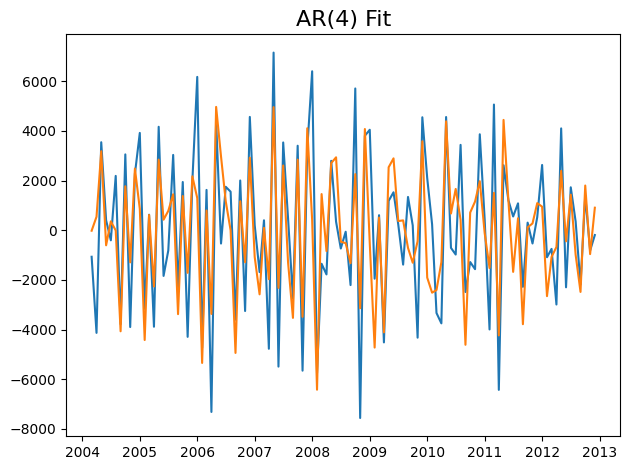

In [11]:
plt.plot(series)
plt.plot(ar_model_fit.fittedvalues)
plt.title('AR(%s) Fit'%4, fontsize=16)

plt.tight_layout()